In this notebook I analyze and plot validation errors from the monkey-hand-pretrained-weights Jarvis model. While most of the errors for each of the 23 keypoints on the 49 validation frames are generally do not exceed 50 pixels, the distribution of the errors for virtually all keypoints reveals that there are several enormous outliers, with errors at times exceeding 1000 pixels. Investigation reveals that all of the errors that exceed 100 pixels are exclusively due to unlabeled keypoints in the "ground truth" validation set file. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matlab_jarvis_files import get_jarvis_errors
from matlab_jarvis_files import scatter_jarvis_errors
from scipy import stats
from matlab_jarvis_files import plot_linklengths as pl

In [2]:
# get validation errors
path_GroundTruth = '/Volumes/L_MillerLab/limblab/User_folders/Aajan/Jarvis_results/Aajan-MonkeyHand-PretrainedWeights-20220512/points_GroundTruth.csv'
path_HybridNetPredictions = '/Volumes/L_MillerLab/limblab/User_folders/Aajan/Jarvis_results/Aajan-MonkeyHand-PretrainedWeights-20220512/points_HybridNet.csv'
med_errs, mean_errors, all_errors = get_jarvis_errors.get_jarvis_errors(path_GroundTruth, path_HybridNetPredictions)

#get the ground truth file directly
gt = np.genfromtxt(path_GroundTruth, delimiter=',')

In [3]:
med_errs, med_errs.shape

(array([2.66661705, 2.54094095, 3.39671883, 5.20103604, 2.92881925,
        3.53370572, 3.30458995, 4.53441843, 2.57017321, 3.26295041,
        4.41022711, 6.16615121, 2.54375979, 3.51335171, 3.80804919,
        5.40524195, 2.43584371, 3.18761135, 5.11901327, 6.71277814,
        6.37916871, 8.39822434, 7.68803315]),
 (23,))

In [4]:
mean_errors, mean_errors.shape

(array([ 58.82844656,  43.69052781,  56.82501375,  72.10635457,
          5.14567245,  32.17851992,  20.36610297,  75.52555146,
          4.84778334,  16.30368718,  43.85105812,  84.85683743,
          6.1127936 ,  21.05592494,  50.87813161,  21.75599543,
         49.31911425,  51.73819507,  53.15612994,  54.64206284,
        117.78927332,  38.57792855,  38.29022322]),
 (23,))

In [5]:
#reshape errors for plotting
all_errors_reshape = np.c_[all_errors, np.zeros(49)]
all_errors_reshape = np.reshape(all_errors_reshape, (-1, 6, 4))
all_errors_reshape.shape

(49, 6, 4)

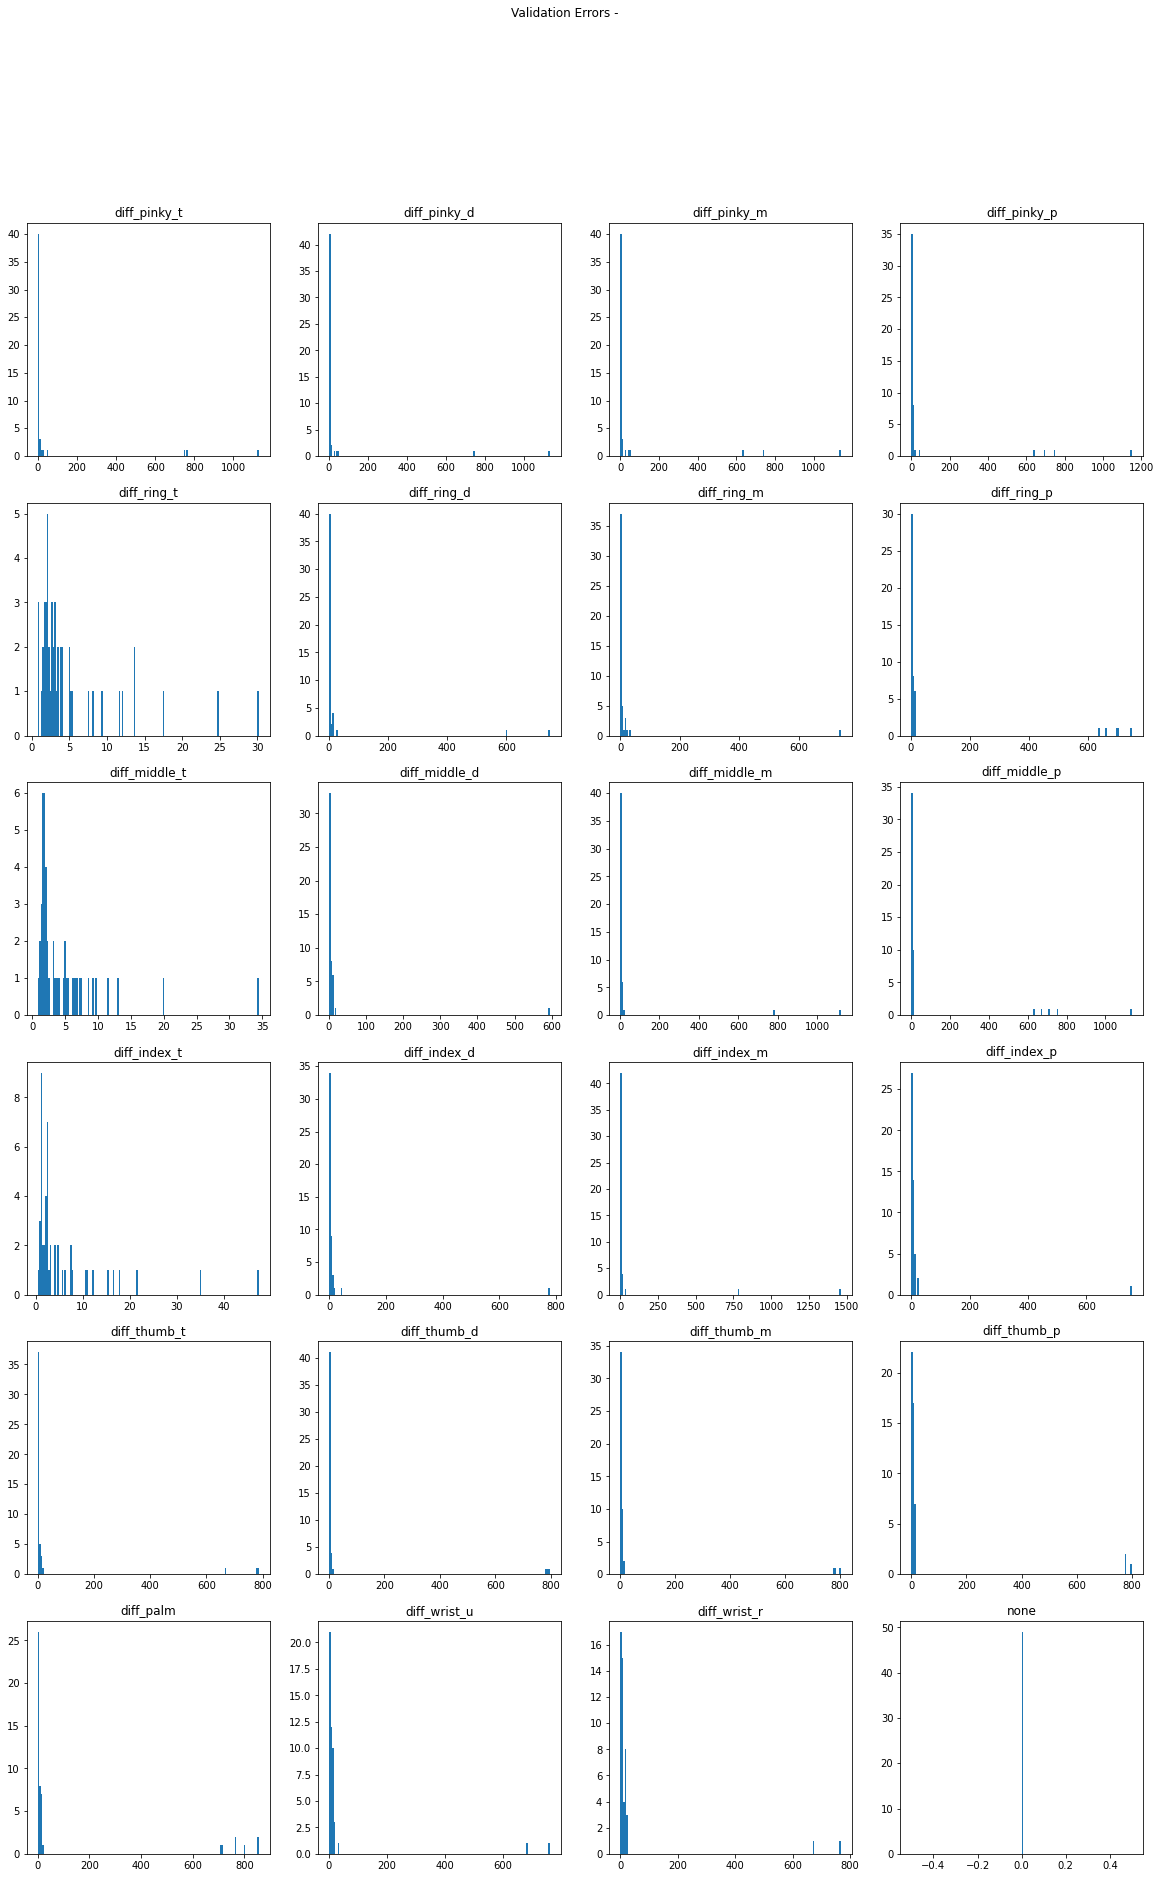

In [6]:
diffs_list = [['diff_pinky_t','diff_pinky_d','diff_pinky_m','diff_pinky_p'],
['diff_ring_t','diff_ring_d','diff_ring_m','diff_ring_p'],
['diff_middle_t','diff_middle_d','diff_middle_m','diff_middle_p'],
['diff_index_t','diff_index_d','diff_index_m','diff_index_p'],
['diff_thumb_t','diff_thumb_d','diff_thumb_m','diff_thumb_p'],
['diff_palm','diff_wrist_u','diff_wrist_r', 'none']]

#plot the distribution of the validation errors for each of the 23 keypoints on 49 validation frames
#most keypoints have several errors on the order of ~800 pixels
fig, ax = plt.subplots(nrows = 6, ncols = 4)
fig.set_size_inches(20, 30)
fig.suptitle('Validation Errors - ')
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i][j].hist(all_errors_reshape[:,i,j], bins = 150)
        ax[i][j].set_title(diffs_list[i][j])
plt.show()

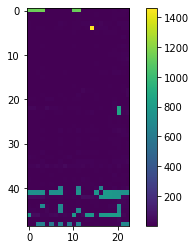

In [7]:
# error heatmap
plt.imshow(all_errors)
plt.colorbar()

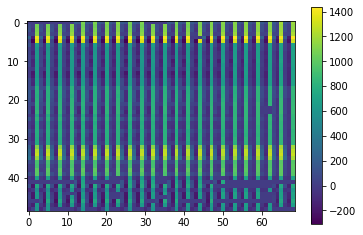

In [15]:
# close visual inspection reveals a correspondence between the largest errors in the errors heatmap and the groundtruth values heatmap
plt.imshow(gt)
plt.colorbar()

In [18]:
# get indices of errors where the error exceeds 100
# 55 total points over 100 pixels in error
np.where(all_errors>100)[0], np.where(all_errors>100)[1], len(np.where(all_errors>100)[1])

(array([ 0,  0,  0,  0,  0,  0,  4, 22, 23, 40, 40, 40, 41, 41, 41, 41, 41,
        41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 44, 44,
        44, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 48, 48, 48, 48,
        48, 48, 48, 48]),
 array([ 0,  1,  2,  3, 10, 11, 14, 20, 20,  7, 11, 16,  0,  1,  2,  3,  5,
         6,  7, 11, 15, 17, 18, 19, 20, 21, 22, 16, 17, 18, 19, 20,  3,  7,
        20,  7, 11, 20,  0, 10, 13, 14, 16, 17, 18, 19, 20,  2,  3,  5,  7,
         9, 11, 21, 22]),
 55)

In [16]:
# Where the error exceeds 100, the groundtruth file contains all 0s!
rows = np.where(all_errors>100)[0]
cols = np.where(all_errors>100)[1]
for i,j in zip(rows, cols):
    print(i, j, gt[i, 3*j:3*j+3])

0 0 [0. 0. 0.]
0 1 [0. 0. 0.]
0 2 [0. 0. 0.]
0 3 [0. 0. 0.]
0 10 [0. 0. 0.]
0 11 [0. 0. 0.]
4 14 [0. 0. 0.]
22 20 [0. 0. 0.]
23 20 [0. 0. 0.]
40 7 [0. 0. 0.]
40 11 [0. 0. 0.]
40 16 [0. 0. 0.]
41 0 [0. 0. 0.]
41 1 [0. 0. 0.]
41 2 [0. 0. 0.]
41 3 [0. 0. 0.]
41 5 [0. 0. 0.]
41 6 [0. 0. 0.]
41 7 [0. 0. 0.]
41 11 [0. 0. 0.]
41 15 [0. 0. 0.]
41 17 [0. 0. 0.]
41 18 [0. 0. 0.]
41 19 [0. 0. 0.]
41 20 [0. 0. 0.]
41 21 [0. 0. 0.]
41 22 [0. 0. 0.]
42 16 [0. 0. 0.]
42 17 [0. 0. 0.]
42 18 [0. 0. 0.]
42 19 [0. 0. 0.]
42 20 [0. 0. 0.]
44 3 [0. 0. 0.]
44 7 [0. 0. 0.]
44 20 [0. 0. 0.]
45 7 [0. 0. 0.]
45 11 [0. 0. 0.]
45 20 [0. 0. 0.]
46 0 [0. 0. 0.]
46 10 [0. 0. 0.]
46 13 [0. 0. 0.]
46 14 [0. 0. 0.]
46 16 [0. 0. 0.]
46 17 [0. 0. 0.]
46 18 [0. 0. 0.]
46 19 [0. 0. 0.]
46 20 [0. 0. 0.]
48 2 [0. 0. 0.]
48 3 [0. 0. 0.]
48 5 [0. 0. 0.]
48 7 [0. 0. 0.]
48 9 [0. 0. 0.]
48 11 [0. 0. 0.]
48 21 [0. 0. 0.]
48 22 [0. 0. 0.]


In [11]:
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999 
df = pd.DataFrame(all_errors)

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1128.468545,1132.289288,1139.752708,1150.988367,5.090092,3.055995,1.755350,2.343189,1.844256,2.921199,1120.072354,1136.504217,1.216217,2.904467,1.835037,2.946602,1.626931,3.055436,5.236873,6.712778,3.772318,6.058068,10.510927
1,2.230981,2.235296,3.994778,5.872645,3.386865,4.022843,1.872476,4.612023,1.777781,0.469918,3.773756,10.707160,1.343023,2.722676,2.580083,6.051815,0.965549,4.441816,2.976922,6.955939,10.287157,7.259156,2.477884
2,1.965686,2.298902,4.373912,4.629458,3.840798,2.534269,2.810251,3.096689,1.809903,3.698031,4.546196,6.166151,1.666598,2.276930,1.034633,4.382222,2.158961,3.798338,4.243615,11.362582,4.712963,3.662647,5.173984
3,7.721498,1.648495,2.876768,5.201036,5.118188,2.881431,2.410450,12.236511,6.687198,3.032665,7.096551,6.800765,15.342885,16.596880,15.535260,9.349519,17.810464,6.971984,7.300223,4.028559,14.915641,13.368109,15.857696
4,6.258884,3.157273,10.381594,9.814337,5.448352,3.611942,9.090870,10.102119,5.037935,2.745092,8.095206,6.622119,4.167613,6.114855,1460.683741,15.195728,11.913358,12.686774,5.790751,7.085786,5.598701,13.207210,11.718078
5,1.722227,0.998052,2.105364,1.287600,0.808125,4.501795,2.355129,4.336575,4.165611,2.077530,8.145430,2.385257,2.499734,1.975387,2.705057,11.209408,5.844309,10.454711,11.176111,9.202959,5.063818,4.865972,5.744974
6,1.749278,0.906992,1.381779,1.276472,3.808905,3.090211,1.820798,3.250456,2.301366,4.737995,3.152654,0.951203,1.972046,1.039667,0.910712,2.657669,1.994879,1.941700,2.527192,1.754614,4.193022,16.615136,1.195722
7,2.704757,2.864117,2.548547,1.046792,2.570497,3.540342,2.901582,1.661092,1.545418,1.730913,1.695404,2.140693,1.349255,1.722332,3.238352,3.482767,4.145975,2.759781,5.740107,3.153029,2.514956,4.070867,4.089183
8,1.326340,2.348460,2.295663,7.385492,2.637215,3.990646,4.271157,4.143903,3.989268,3.292047,7.798818,4.102080,3.210012,1.562627,2.322855,6.402646,2.100462,2.883551,2.570999,3.365311,7.745714,13.240778,7.688033
9,1.563356,1.745464,1.887386,1.683545,2.132467,1.882301,2.714647,1.713046,1.782582,2.619352,2.865639,2.928787,0.989560,3.513352,1.486920,3.801643,0.861822,4.524438,3.075282,6.526303,2.062687,6.215115,8.141529
